# Using `matplotlib.pyplot` to visualize data

The purpose of this exercise is to visualize the gender gap across colege degrees. 

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp)  releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) .

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


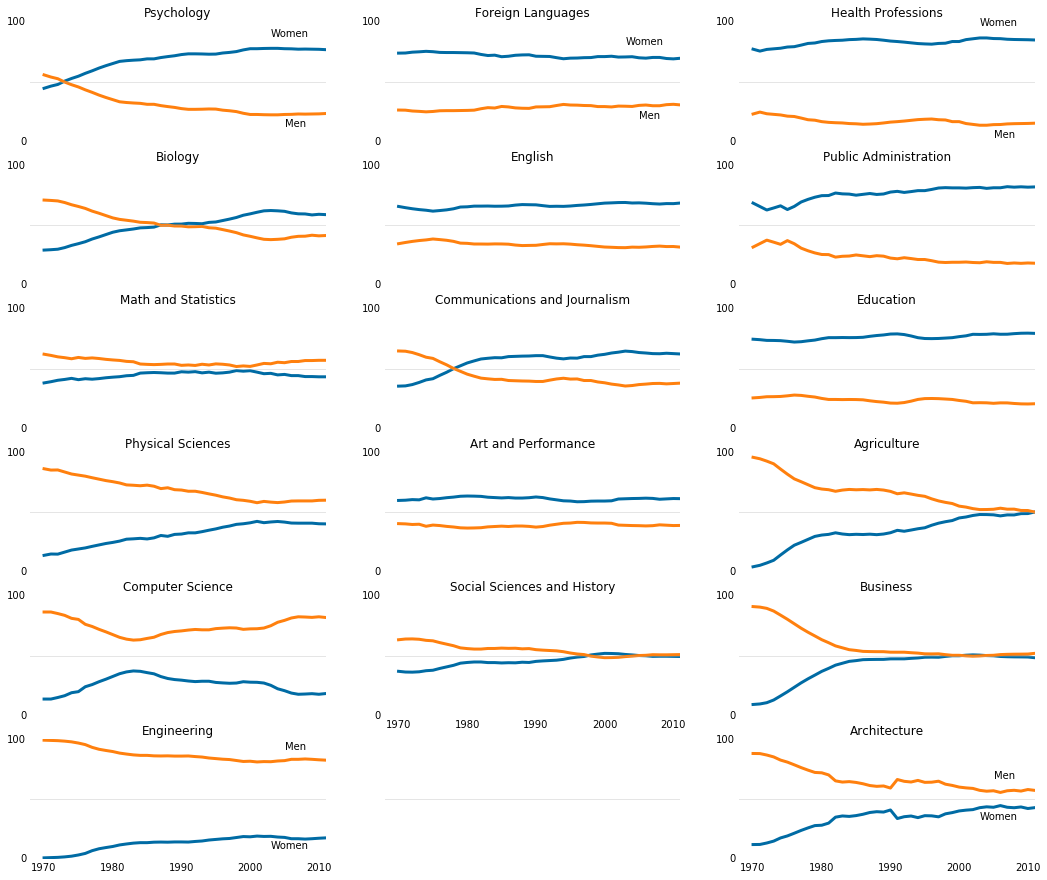

In [9]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(18, 15))

for sp in range(0,18):
    ax = fig.add_subplot(6,3,sp+1)
    # Set general visual parameters
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_xlim(1968, 2011)

    if (sp % 3) == 0:
        index = int(sp / 3)
        ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(stem_cats[index])

        if (index == 0) or (index==5):
            women_y = women_degrees.loc[women_degrees['Year'] == 2003,:].iloc[0][stem_cats[index]]
            if women_y > 50:
                women_y += 10
            else:
                women_y -= 10
            men_y = 100 - women_y
            ax.text(2005, men_y, 'Men')
            ax.text(2003, women_y, 'Women')
            if index == 5:
                ax.tick_params(labelbottom='on')
    elif (sp % 3) == 1:
        index = int((sp - 1) / 3)
        if index < len(lib_arts_cats):
            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[index])
            if (index == 0):
                women_y = women_degrees.loc[women_degrees['Year'] == 2003,:].iloc[0][lib_arts_cats[index]] + 10
                men_y = 100 - women_y
                ax.text(2005, men_y, 'Men')
                ax.text(2003, women_y, 'Women')
            elif index == 4:
                ax.tick_params(labelbottom='on')
        else:
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    elif (sp % 3) == 2:
        index = int((sp - 2) / 3)
        if index < len(other_cats):
            ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[index])
            if (index == 0) or (index==5):
                women_y = women_degrees.loc[women_degrees['Year'] == 2003,:].iloc[0][other_cats[index]]
                if women_y > 50:
                    women_y += 10
                else:
                    women_y -= 10
                men_y = 100 - women_y
                ax.text(2005, men_y, 'Men')
                ax.text(2003, women_y, 'Women')
                if index == 5:
                    ax.tick_params(labelbottom='on')
        else:
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    
    for k, spine in ax.spines.items():
        spine.set_visible(False)  

    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

plt.savefig('gender_degrees.png')
plt.show()

The purpose was to 'beautify' as much as possible the plot while being effective. 
- We used only one for loop and because we had to work with 3 lists, we used a modulo 3 division in order to access data from the lists
- We removed as much as possible irellevant information: 
    - tick displays on both axes
    - y axis tick labels left only for the subplots at the bottom of each column 
    - x axis tick labels reduced to only two values, 0 and 100. 
- Added a middle horizontal line at 50 for each subplot to make the gap vizualization easy.    
